# Primeira Parte

#### Pegando os valores em binario do arquivo de teste e treino

In [14]:
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 #tamanho l x l 
no_de_labels_diferentes = 10 # 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size # 28*28
data_path = "data/mnist/" # caminho para os arquivos
base_treino = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
base_teste = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
print(base_teste[:10])
#print(base_treino[:10])

base_teste.shape

[[7. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [9. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]]


(10000, 785)

In [15]:
fac = 0.99 / 255
imagens_treino = np.asfarray(base_treino[:, 1:]) * fac + 0.01 # asfarray([2, 3]) => [2.,3.]
imagensTeste = np.asfarray(base_teste[:, 1:]) * fac + 0.01

rotulosTreino = np.asfarray(base_treino[:, :1]) # Aplicando para os rotulos
rotulosTeste = np.asfarray(base_teste[:, :1])
#print(imagens_treino[:10])
#print(imagensTeste[:10])
#print(rotulosTreino[:10])
#print(rotulosTeste[:10])

## Mostrando o comportamento da coversão do rotulo

In [16]:
lr = np.arange(10)

for rotulo in range(10):
    valor = (lr==rotulo).astype(np.int32) # Mudando de Bool para int
    print("valor: ", rotulo, " representação: ", valor)


valor:  0  representação:  [1 0 0 0 0 0 0 0 0 0]
valor:  1  representação:  [0 1 0 0 0 0 0 0 0 0]
valor:  2  representação:  [0 0 1 0 0 0 0 0 0 0]
valor:  3  representação:  [0 0 0 1 0 0 0 0 0 0]
valor:  4  representação:  [0 0 0 0 1 0 0 0 0 0]
valor:  5  representação:  [0 0 0 0 0 1 0 0 0 0]
valor:  6  representação:  [0 0 0 0 0 0 1 0 0 0]
valor:  7  representação:  [0 0 0 0 0 0 0 1 0 0]
valor:  8  representação:  [0 0 0 0 0 0 0 0 1 0]
valor:  9  representação:  [0 0 0 0 0 0 0 0 0 1]


In [17]:
lr = np.arange(no_de_labels_diferentes)

# Modificar os rotulos em representação em 0 e 1
oneHotRotulosTreino = (lr==rotulosTreino).astype(float)
oneHotRotulosTeste = (lr==rotulosTeste).astype(float)
#print(oneHotRotulosTreino[:10])
#print(oneHotRotulosTeste[:10])
# Retirar os 0 e 1 das representações
oneHotRotulosTreino[oneHotRotulosTreino==0] = 0.01
oneHotRotulosTreino[oneHotRotulosTreino==1] = 0.99
oneHotRotulosTeste[oneHotRotulosTeste==0] = 0.01
oneHotRotulosTeste[oneHotRotulosTeste==1] = 0.99
#print(oneHotRotulosTreino[:10])
#print(oneHotRotulosTeste[:10])

## Representaçao da imagem de 28x28 do MNIST

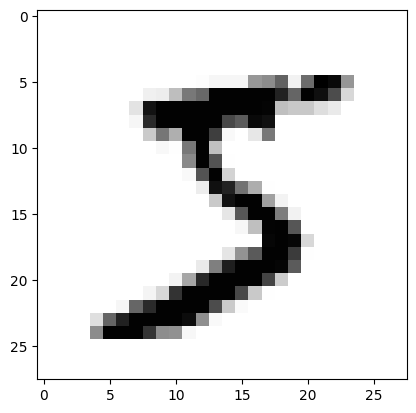

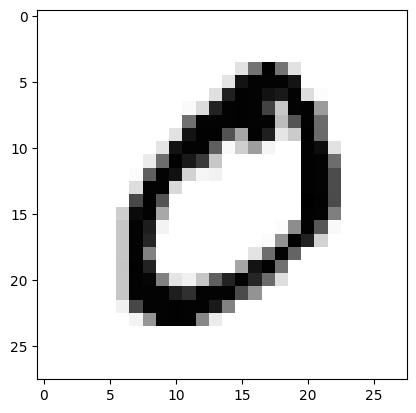

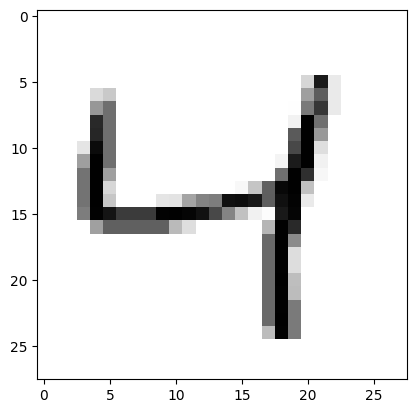

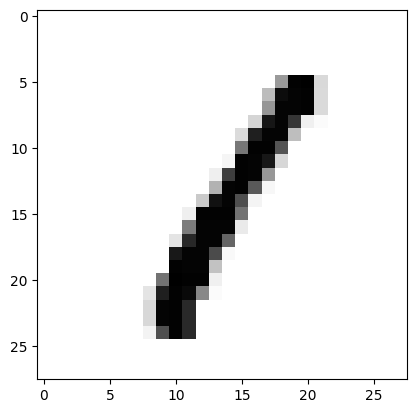

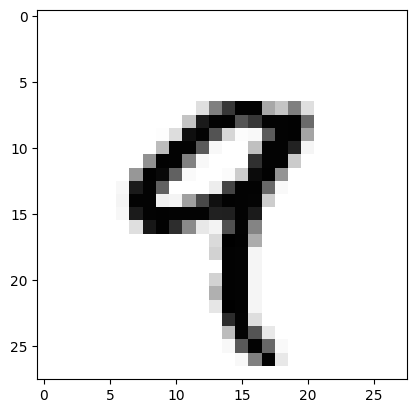

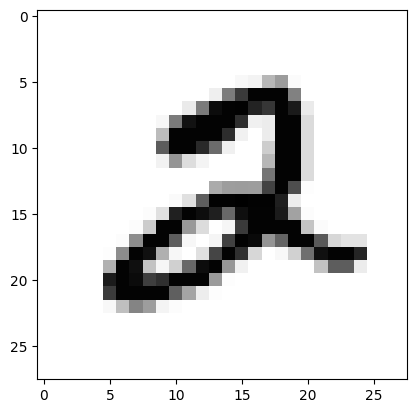

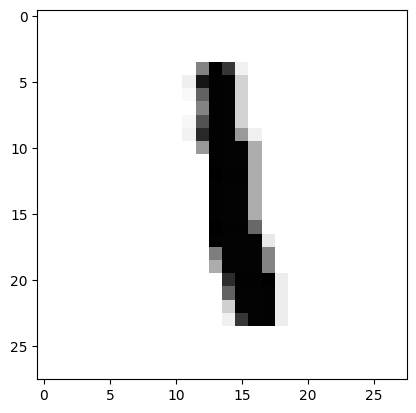

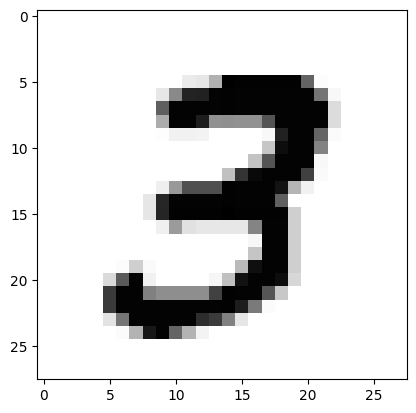

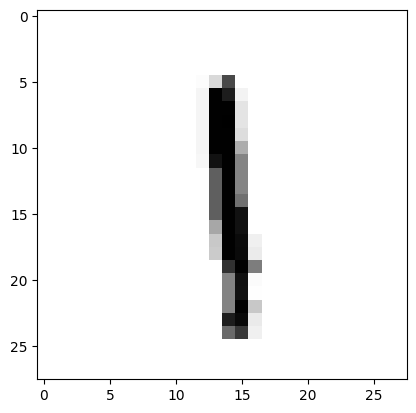

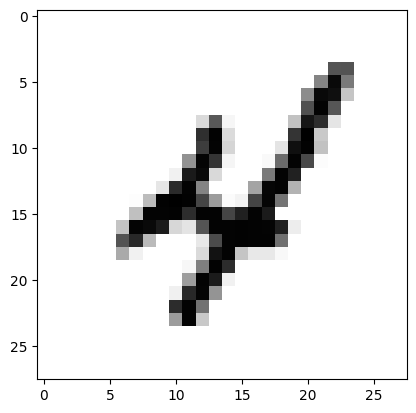

In [18]:
for i in range(10):
    img = imagens_treino[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [19]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "bw") as fh:
    data = (imagens_treino, 
            imagensTeste, 
            rotulosTreino,
            rotulosTeste)
    pickle.dump(data, fh)

In [20]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

imagens_treino = data[0]
imagensTeste = data[1]
rotulosTreino = data[2]
rotulosTeste = data[3]

oneHotRotulosTreino = (lr==rotulosTreino).astype(float)
oneHotRotulosTeste = (lr==rotulosTeste).astype(float)


image_size = 28 # Tamanho l x l 
no_de_labels_diferentes = 10 # 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [21]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
funcaoDeAtivacao = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)


class NeuralNetwork:
 
    def __init__(self, 
                 no_entradas, 
                 no_saidas,
                 no_camadasOcultas,
                 taxaAprendizagem,
                 bias=None
                ):  

        self.no_entradas = no_entradas
        self.no_saidas = no_saidas
        
        self.no_camadasOcultas = no_camadasOcultas
            
        self.taxaAprendizagem = taxaAprendizagem 
        self.bias = bias
        self.criarMatrizDePesos()
    
        
    
    def criarMatrizDePesos(self):
        """ Um método para inicializar as matrizes de peso da
            rede neural com nós de polarização opcionais(bias)"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_entradas + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        # Pesos aleatorios para a camada oculta 
        self.wih = X.rvs((self.no_camadasOcultas, 
                          self.no_entradas + bias_node))
        
        
        rad = 1 / np.sqrt(self.no_camadasOcultas + bias_node)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        
        # Pesos aleatorios para a camada saida
        self.who = X.rvs((self.no_saidas, 
                          self.no_camadasOcultas + bias_node))
        
 
    def train_single(self, vetorDeEntrada, vetorAlvo):

        bias_node = 1 if self.bias else 0
        if self.bias:
            # adicionando bias ao valor do vetor
            vetorDeEntrada = np.concatenate( (vetorDeEntrada, 
                                            [self.bias]) )
        
        vetoresDeSaida = []
        
        vetorDeEntrada = np.array(vetorDeEntrada, ndmin=2).T
        vetorAlvo = np.array(vetorAlvo, ndmin=2).T

        
        vetorDeSaida = np.dot(self.wih, 
                                vetorDeEntrada)
        saidaCamadaOculta = funcaoDeAtivacao(vetorDeSaida)
        
        if self.bias:
            saidaCamadaOculta = np.concatenate((saidaCamadaOculta, 
                                            [[self.bias]]) )

        
        vetorDeSaida_B = np.dot(self.who, 
                                saidaCamadaOculta)
        saidaRN = funcaoDeAtivacao(vetorDeSaida_B)
        
        saidaErros = vetorAlvo - saidaRN
        # update the weights:
        tmp = saidaErros * saidaRN * (1.0 - saidaRN)          
        tmp = self.taxaAprendizagem  * np.dot(tmp, 
                                           saidaCamadaOculta.T) 
        self.who += tmp

        
        # calculate hidden errors:
        errosCamadaOculta = np.dot(self.who.T, 
                               saidaErros)
        # update the weights:
        tmp = errosCamadaOculta * saidaCamadaOculta * (1.0 - saidaCamadaOculta)
        if self.bias:
            x = np.dot(tmp, vetorDeEntrada.T)[:-1,:] 
        else:
            x = np.dot(tmp, vetorDeEntrada.T)
        self.wih += self.taxaAprendizagem * x
        

    def treino(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False): # Lista de Itens, possiveis rotulos, epochs
        pesosIntermediarios = []
        for epoch in range(epochs):  
            for i in range(len(data_array)):
                self.train_single(data_array[i], 
                                  labels_one_hot_array[i])
            if intermediate_results:
                pesosIntermediarios.append((self.wih.copy(), 
                                             self.who.copy()))
        return pesosIntermediarios      
    
    def run(self, vetorDeEntrada):
        
        if self.bias:
            vetorDeEntrada = np.concatenate( (vetorDeEntrada, 
                                            [self.bias]) )
        vetorDeEntrada = np.array(vetorDeEntrada, ndmin=2).T

        vetorDeSaida = np.dot(self.wih, 
                               vetorDeEntrada)
        vetorDeSaida = funcaoDeAtivacao(vetorDeSaida)
        
        if self.bias:
            vetorDeSaida = np.concatenate( (vetorDeSaida, 
                                             [[self.bias]]) )
            

        vetorDeSaida = np.dot(self.who, 
                               vetorDeSaida)
        vetorDeSaida = funcaoDeAtivacao(vetorDeSaida)
    
        return vetorDeSaida
    
    
    def evaluate(self, data, labels):
        corretos, errados = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corretos += 1
            else:
                errados += 1
        return corretos, errados

In [22]:
epochs = 2
# Criando e colocando os parametros na rede neural
ANN = NeuralNetwork(no_entradas=image_pixels, 
                    no_saidas=10,
                    no_camadasOcultas=100,
                    taxaAprendizagem=0.4,
                   bias=None)

ANN.treino(imagens_treino, oneHotRotulosTreino)

for i in range(10):
    res = ANN.run(imagensTeste[i])
    print(rotulosTeste[i], np.argmax(res), np.max(res))
#ANN.treino(imagens_treino, oneHotRotulosTreino)
#print(oneHotRotulosTreino.shape)
#res = ANN.run(imagensTeste[4])
#print(imagensTeste[4])
#img = imagensTeste[4].reshape((28,28))
#plt.imshow(img, cmap="Greys")
#plt.show()
#print(rotulosTeste[4], np.argmax(res), np.max(res))

[7.] 7 0.9994221787798206
[2.] 2 0.9968798233822721
[1.] 1 0.9998945083720885
[0.] 0 0.9994013232383254
[4.] 4 0.992440883263811
[1.] 1 0.9974535883756623
[4.] 4 0.9669626629772615
[9.] 9 0.9778800578690557
[5.] 2 0.08858785477711177
[9.] 9 0.9804055750617162
